#***Osama Ghaleb Zumari / Machine Learning Final Assignment***

# Data

### Reading Data

In [1]:
import pandas as pd
import statistics as st
import numpy as np
from sklearn.metrics import classification_report
df = pd.read_csv('/content/Occupancy_Estimation.csv')
df

,Date,Time,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
0,2017/12/22,10:49:41,24.94,24.75,24.56,25.38,121,34,53,40,0.08,0.19,0.06,0.06,390,0.769231,0,0,1
1,2017/12/22,10:50:12,24.94,24.75,24.56,25.44,121,33,53,40,0.93,0.05,0.06,0.06,390,0.646154,0,0,1
2,2017/12/22,10:50:42,25.00,24.75,24.50,25.44,121,34,53,40,0.43,0.11,0.08,0.06,390,0.519231,0,0,1
3,2017/12/22,10:51:13,25.00,24.75,24.56,25.44,121,34,53,40,0.41,0.10,0.10,0.09,390,0.388462,0,0,1
4,2017/12/22,10:51:44,25.00,24.75,24.56,25.44,121,34,54,40,0.18,0.06,0.06,0.06,390,0.253846,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10124,2018/01/11,08:58:07,25.06,25.13,24.69,25.31,6,7,33,22,0.09,0.04,0.06,0.08,345,0.000000,0,0,0
10125,2018/01/11,08:58:37,25.06,25.06,24.69,25.25,6,7,34,22,0.07,0.05,0.05,0.08,345,0.000000,0,0,0
10126,2018/01/11,08:59:08,25.13,25.06,24.69,25.25,6,7,34,22,0.11,0.05,0.06,0.08,345,0.000000,0,0,0
10127,2018/01/11,08:59:39,25.13,25.06,24.69,25.25,6,7,34,22,0.08,0.08,0.10,0.08,345,0.000000,0,0,0


### Data Picture

In [2]:
df.corr()

<ipython-input-2-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
S1_Temp,1.000000,0.799707,0.948839,0.855279,0.680743,0.548735,0.645163,0.212217,0.436099,0.391137,0.438769,0.355826,0.866718,0.137391,0.436363,0.474077,0.700868
S2_Temp,0.799707,1.000000,0.765525,0.696581,0.639773,0.645987,0.607349,0.370897,0.438274,0.409545,0.427133,0.378724,0.743722,0.202547,0.476901,0.465884,0.671263
S3_Temp,0.948839,0.765525,1.000000,0.885186,0.594311,0.500054,0.642601,0.301419,0.375183,0.344026,0.398177,0.326182,0.821308,0.095842,0.403355,0.460309,0.652047
S4_Temp,0.855279,0.696581,0.885186,1.000000,0.581482,0.456350,0.588459,0.386871,0.355111,0.312594,0.340808,0.294939,0.650320,0.106208,0.340000,0.339037,0.526509
S1_Light,0.680743,0.639773,0.594311,0.581482,1.000000,0.842090,0.816438,0.510853,0.601166,0.534274,0.494080,0.441712,0.602740,0.498185,0.607159,0.545213,0.849058
S2_Light,0.548735,0.645987,0.500054,0.456350,0.842090,1.000000,0.709579,0.458914,0.503021,0.560630,0.439269,0.413932,0.566764,0.493281,0.554658,0.556797,0.788764
S3_Light,0.645163,0.607349,0.642601,0.588459,0.816438,0.709579,1.000000,0.579484,0.502606,0.434859,0.577151,0.473606,0.650829,0.447708,0.501836,0.577815,0.793081
S4_Light,0.212217,0.370897,0.301419,0.386871,0.510853,0.458914,0.579484,1.000000,0.293632,0.303949,0.169702,0.200793,0.148608,0.212718,0.324545,0.220196,0.355715
S1_Sound,0.436099,0.438274,0.375183,0.355111,0.601166,0.503021,0.502606,0.293632,1.000000,0.560062,0.540736,0.557733,0.391903,0.335772,0.522015,0.463040,0.573748
S2_Sound,0.391137,0.409545,0.344026,0.312594,0.534274,0.560630,0.434859,0.303949,0.560062,1.000000,0.529830,0.578635,0.333836,0.357235,0.485697,0.507231,0.557853


In [3]:
df.isnull().sum()

Date                    0
Time                    0
S1_Temp                 0
S2_Temp                 0
S3_Temp                 0
S4_Temp                 0
S1_Light                0
S2_Light                0
S3_Light                0
S4_Light                0
S1_Sound                0
S2_Sound                0
S3_Sound                0
S4_Sound                0
S5_CO2                  0
S5_CO2_Slope            0
S6_PIR                  0
S7_PIR                  0
Room_Occupancy_Count    0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10129 entries, 0 to 10128
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  10129 non-null  object 
 1   Time                  10129 non-null  object 
 2   S1_Temp               10129 non-null  float64
 3   S2_Temp               10129 non-null  float64
 4   S3_Temp               10129 non-null  float64
 5   S4_Temp               10129 non-null  float64
 6   S1_Light              10129 non-null  int64  
 7   S2_Light              10129 non-null  int64  
 8   S3_Light              10129 non-null  int64  
 9   S4_Light              10129 non-null  int64  
 10  S1_Sound              10129 non-null  float64
 11  S2_Sound              10129 non-null  float64
 12  S3_Sound              10129 non-null  float64
 13  S4_Sound              10129 non-null  float64
 14  S5_CO2                10129 non-null  int64  
 15  S5_CO2_Slope       

In [5]:
df.duplicated().sum()

0

In [6]:
df.describe()

,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
count,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.00000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000
mean,25.454012,25.546059,25.056621,25.754125,25.445059,26.01629,34.248494,13.220259,0.168178,0.120066,0.158119,0.103840,460.860401,-0.004830,0.090137,0.079574,0.398559
std,0.351351,0.586325,0.427283,0.356434,51.011264,67.30417,58.400744,19.602219,0.316709,0.266503,0.413637,0.120683,199.964940,1.164990,0.286392,0.270645,0.893633
min,24.940000,24.750000,24.440000,24.940000,0.000000,0.00000,0.000000,0.000000,0.060000,0.040000,0.040000,0.050000,345.000000,-6.296154,0.000000,0.000000,0.000000
25%,25.190000,25.190000,24.690000,25.440000,0.000000,0.00000,0.000000,0.000000,0.070000,0.050000,0.060000,0.060000,355.000000,-0.046154,0.000000,0.000000,0.000000
50%,25.380000,25.380000,24.940000,25.750000,0.000000,0.00000,0.000000,0.000000,0.080000,0.050000,0.060000,0.080000,360.000000,0.000000,0.000000,0.000000,0.000000
75%,25.630000,25.630000,25.380000,26.000000,12.000000,14.00000,50.000000,22.000000,0.080000,0.060000,0.070000,0.100000,465.000000,0.000000,0.000000,0.000000,0.000000
max,26.380000,29.000000,26.190000,26.560000,165.000000,258.00000,280.000000,74.000000,3.880000,3.440000,3.670000,3.400000,1270.000000,8.980769,1.000000,1.000000,3.000000














### Functions For Data Preparing

In [7]:
def DayNumber():
  df['Date'] = pd.to_datetime(df['Date'])
  df['Day'] = df['Date'].dt.day

  for x in range(len(df['Day'])):
    if df['Day'].loc[x] == 22:
      df['Day'].loc[x] = 1

    elif df['Day'].loc[x] == 23:
      df['Day'].loc[x] = 2

    elif df['Day'].loc[x] == 24:
      df['Day'].loc[x] = 3

    elif df['Day'].loc[x] == 25:
      df['Day'].loc[x] = 4

    elif df['Day'].loc[x] == 26:
      df['Day'].loc[x] = 5

    elif df['Day'].loc[x] == 10:
      df['Day'].loc[x] = 6

    elif df['Day'].loc[x] == 11:
      df['Day'].loc[x] = 7

def TimePeriod():
  df['Time'] = pd.to_datetime(df['Time'])
  df['Hour'] = df['Time'].dt.hour
  df['Time_Period'] = df['Time'].dt.hour

  for x in range(len(df['Time_Period'])):
    if df['Time_Period'].loc[x] >= 0 and df['Time_Period'].loc[x] <= 5:
      df['Time_Period'].loc[x] = 'Night'

    elif df['Time_Period'].loc[x] >= 6 and df['Time_Period'].loc[x] <= 11:
      df['Time_Period'].loc[x] = 'Morning'

    elif df['Time_Period'].loc[x] >= 12 and df['Time_Period'].loc[x] <= 17:
      df['Time_Period'].loc[x] = 'Afternoon'

    elif df['Time_Period'].loc[x] >= 18 and df['Time_Period'].loc[x] <= 23:
      df['Time_Period'].loc[x] = 'Evening'

In [8]:
DayNumber()
TimePeriod()

<ipython-input-7-c74d2d1d3c26>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Day'].loc[x] = 1
<ipython-input-7-c74d2d1d3c26>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Day'].loc[x] = 2
<ipython-input-7-c74d2d1d3c26>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Day'].loc[x] = 3
<ipython-input-7-c74d2d1d3c26>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the

In [9]:
df = df.drop(['Date' , 'Time'] , axis = 1)

# Analyzing Data

### Libraires and Pair Plot

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
#sns.pairplot(df)
#plt.show()

### Temperature Sensors

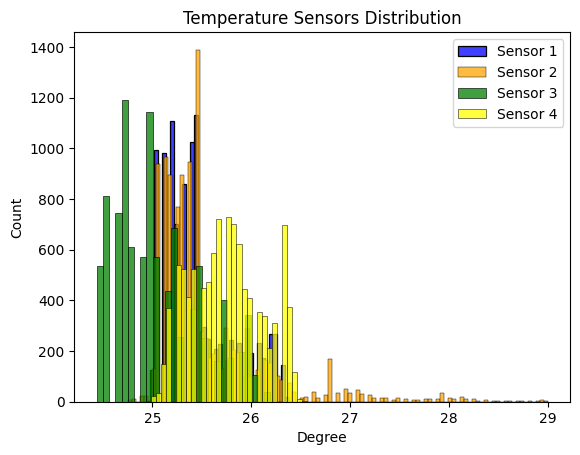

In [12]:
sns.histplot(x='S1_Temp', data=df, label='Sensor 1' , color = 'blue')
sns.histplot(x='S2_Temp', data=df, label='Sensor 2' , color = 'orange')
sns.histplot(x='S3_Temp', data=df, label='Sensor 3' , color = 'green')
sns.histplot(x='S4_Temp', data=df, label='Sensor 4' , color = 'yellow')

plt.title("Temperature Sensors Distribution")
plt.xlabel("Degree")
plt.legend()
plt.show()

In this graph it shows the disturbutions of the sensors observations less than 26.4 degrees, which we can see that the observations are for all sensors, and after 26.4 degrees, all the observations are for sensor 2

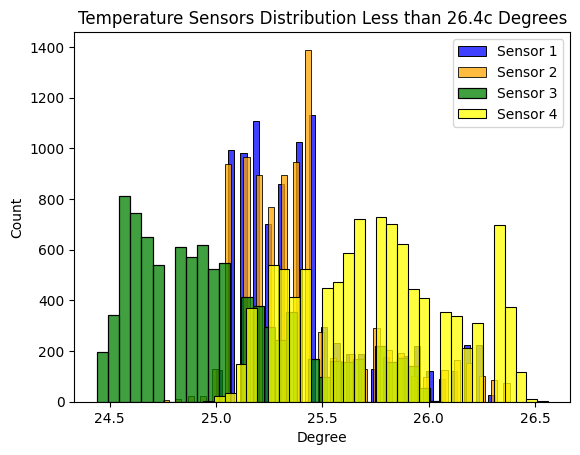

In [13]:
SeeH = df[(df['S2_Temp'] <= 26.4)]
sns.histplot(x='S1_Temp', data=SeeH, label='Sensor 1' , color = 'blue')
sns.histplot(x='S2_Temp', data=SeeH, label='Sensor 2' , color = 'orange')
sns.histplot(x='S3_Temp', data=SeeH, label='Sensor 3' , color = 'green')
sns.histplot(x='S4_Temp', data=df, label='Sensor 4' , color = 'yellow')

plt.title("Temperature Sensors Distribution Less than 26.4c Degrees")
plt.xlabel("Degree")
plt.legend()
plt.show()

All these sensors are recording the same room's temperature, so, they all should be within the same differents. In another meaning, when a sensor is recording low temperature, other sensors should do the same.

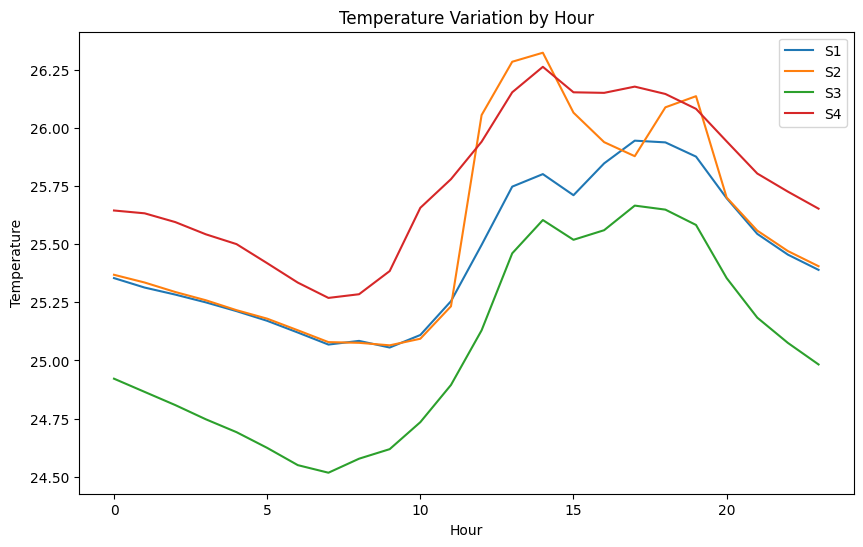

In [14]:
S1 = pd.DataFrame(df[['S1_Temp' , 'Hour']])
S2 = pd.DataFrame(df[['S2_Temp' , 'Hour']])
S3 = pd.DataFrame(df[['S3_Temp' , 'Hour']])
S4 = pd.DataFrame(df[['S4_Temp' , 'Hour']])

S1 = S1.groupby(['Hour']).mean()
S2 = S2.groupby(['Hour']).mean()
S3 = S3.groupby(['Hour']).mean()
S4 = S4.groupby(['Hour']).mean()

plt.figure(figsize=(10, 6))

plt.plot(S1.index, S1['S1_Temp'], label='S1')

plt.plot(S2.index, S2['S2_Temp'], label='S2')

plt.plot(S3.index, S3['S3_Temp'], label='S3')

plt.plot(S4.index, S4['S4_Temp'], label='S4')

plt.title('Temperature Variation by Hour')
plt.xlabel('Hour')
plt.ylabel('Temperature')
plt.legend()
plt.show()

### Light Sensors

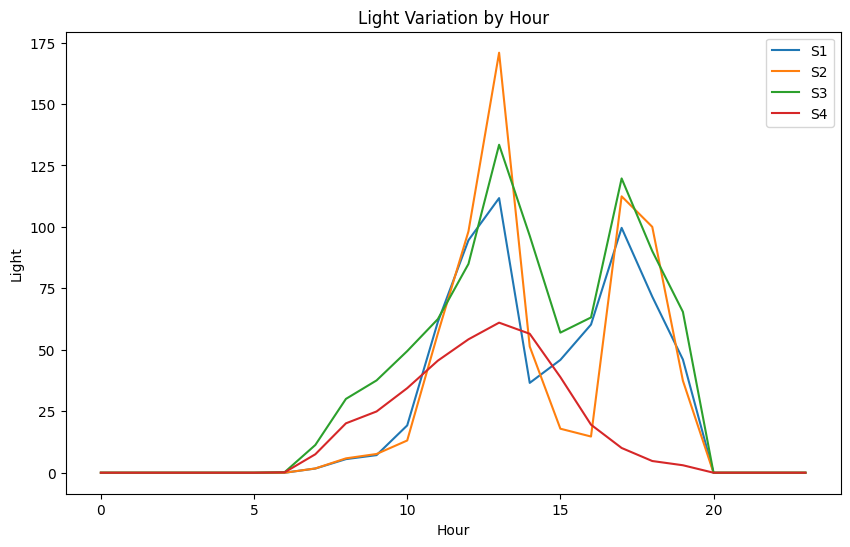

In [15]:
S1 = pd.DataFrame(df[['S1_Light' , 'Hour']])
S2 = pd.DataFrame(df[['S2_Light' , 'Hour']])
S3 = pd.DataFrame(df[['S3_Light' , 'Hour']])
S4 = pd.DataFrame(df[['S4_Light' , 'Hour']])

S1 = S1.groupby(['Hour']).mean()
S2 = S2.groupby(['Hour']).mean()
S3 = S3.groupby(['Hour']).mean()
S4 = S4.groupby(['Hour']).mean()

plt.figure(figsize=(10, 6))

plt.plot(S1.index, S1['S1_Light'], label='S1')

plt.plot(S2.index, S2['S2_Light'], label='S2')

plt.plot(S3.index, S3['S3_Light'], label='S3')

plt.plot(S4.index, S4['S4_Light'], label='S4')

plt.title('Light Variation by Hour')
plt.xlabel('Hour')
plt.ylabel('Light')
plt.legend()
plt.show()

### Sound Sensors

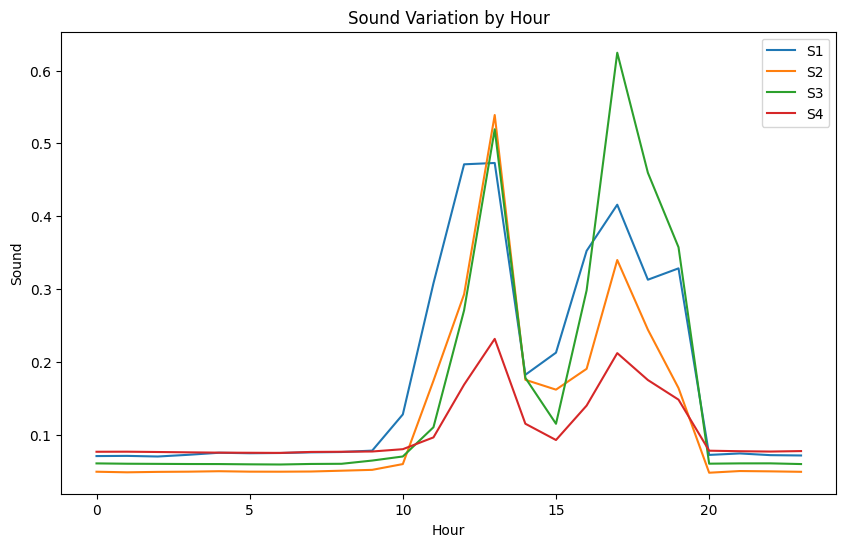

In [16]:
S1 = pd.DataFrame(df[['S1_Sound' , 'Hour']])
S2 = pd.DataFrame(df[['S2_Sound' , 'Hour']])
S3 = pd.DataFrame(df[['S3_Sound' , 'Hour']])
S4 = pd.DataFrame(df[['S4_Sound' , 'Hour']])

S1 = S1.groupby(['Hour']).mean()
S2 = S2.groupby(['Hour']).mean()
S3 = S3.groupby(['Hour']).mean()
S4 = S4.groupby(['Hour']).mean()

plt.figure(figsize=(10, 6))

plt.plot(S1.index, S1['S1_Sound'], label='S1')

plt.plot(S2.index, S2['S2_Sound'], label='S2')

plt.plot(S3.index, S3['S3_Sound'], label='S3')

plt.plot(S4.index, S4['S4_Sound'], label='S4')

plt.title('Sound Variation by Hour')
plt.xlabel('Hour')
plt.ylabel('Sound')
plt.legend()
plt.show()

### Co2 Sensor

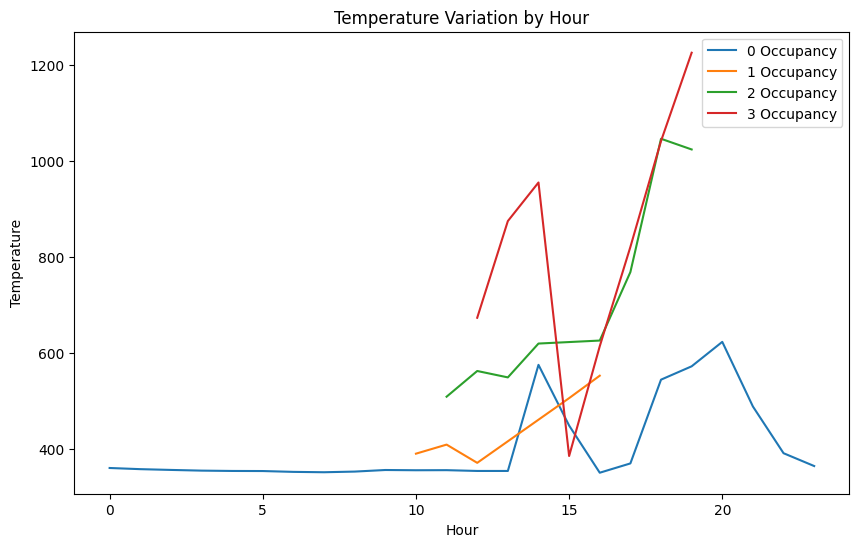

In [17]:
O1 = df[(df['Room_Occupancy_Count'] == 0)]
O2 = df[(df['Room_Occupancy_Count'] == 1)]
O3 = df[(df['Room_Occupancy_Count'] == 2)]
O4 = df[(df['Room_Occupancy_Count'] == 3)]

O1 = pd.DataFrame(O1[['S5_CO2' , 'Hour']])
O1 = O1.groupby(['Hour']).mean()

O2 = pd.DataFrame(O2[['S5_CO2' , 'Hour']])
O2 = O2.groupby(['Hour']).mean()

O3 = pd.DataFrame(O3[['S5_CO2' , 'Hour']])
O3 = O3.groupby(['Hour']).mean()

O4 = pd.DataFrame(O4[['S5_CO2' , 'Hour']])
O4 = O4.groupby(['Hour']).mean()

plt.figure(figsize=(10, 6))

plt.plot(O1.index, O1['S5_CO2'], label='0 Occupancy')

plt.plot(O2.index, O2['S5_CO2'], label='1 Occupancy')

plt.plot(O3.index, O3['S5_CO2'], label='2 Occupancy')

plt.plot(O4.index, O4['S5_CO2'], label='3 Occupancy')

plt.title('Temperature Variation by Hour')
plt.xlabel('Hour')
plt.ylabel('Temperature')
plt.legend()
plt.show()

### Co2 Sensor Slope

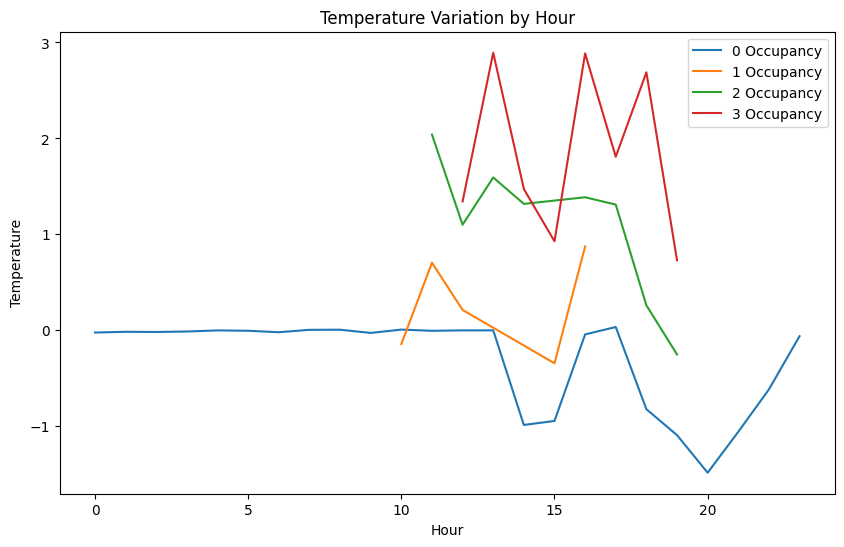

In [18]:
O1 = df[(df['Room_Occupancy_Count'] == 0)]
O2 = df[(df['Room_Occupancy_Count'] == 1)]
O3 = df[(df['Room_Occupancy_Count'] == 2)]
O4 = df[(df['Room_Occupancy_Count'] == 3)]

O1 = pd.DataFrame(O1[['S5_CO2_Slope' , 'Hour']])
O1 = O1.groupby(['Hour']).mean()

O2 = pd.DataFrame(O2[['S5_CO2_Slope' , 'Hour']])
O2 = O2.groupby(['Hour']).mean()

O3 = pd.DataFrame(O3[['S5_CO2_Slope' , 'Hour']])
O3 = O3.groupby(['Hour']).mean()

O4 = pd.DataFrame(O4[['S5_CO2_Slope' , 'Hour']])
O4 = O4.groupby(['Hour']).mean()

plt.figure(figsize=(10, 6))

plt.plot(O1.index, O1['S5_CO2_Slope'], label='0 Occupancy')

plt.plot(O2.index, O2['S5_CO2_Slope'], label='1 Occupancy')

plt.plot(O3.index, O3['S5_CO2_Slope'], label='2 Occupancy')

plt.plot(O4.index, O4['S5_CO2_Slope'], label='3 Occupancy')

plt.title('Temperature Variation by Hour')
plt.xlabel('Hour')
plt.ylabel('Temperature')
plt.legend()
plt.show()

### PIR

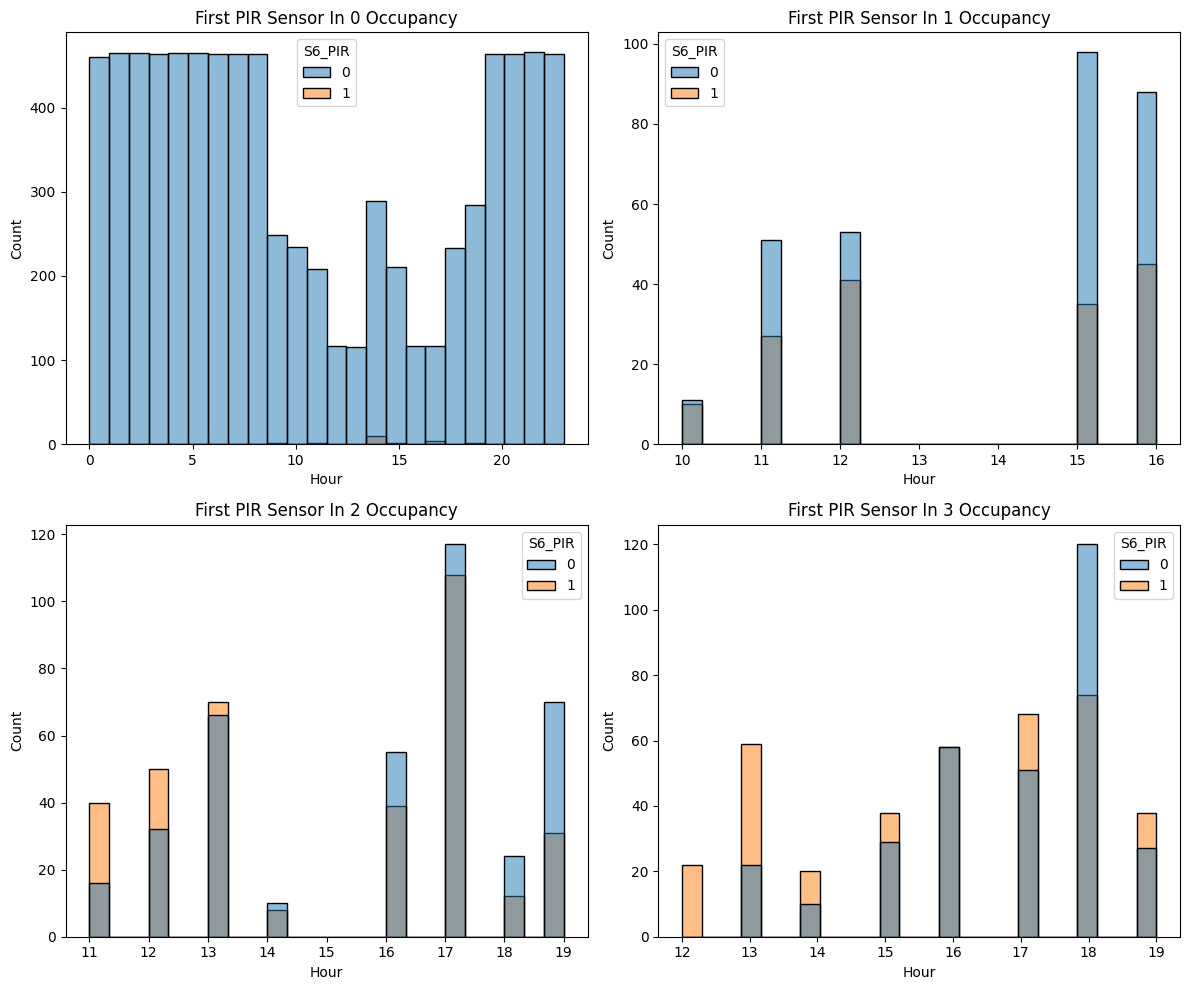

In [19]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

O1 = df[(df['Room_Occupancy_Count'] == 0)]
O2 = df[(df['Room_Occupancy_Count'] == 1)]
O3 = df[(df['Room_Occupancy_Count'] == 2)]
O4 = df[(df['Room_Occupancy_Count'] == 3)]

sns.histplot(x='Hour', hue='S6_PIR', data=O1, ax=axes[0, 0], bins = 24)
axes[0, 0].set_title('First PIR Sensor In 0 Occupancy')
axes[0, 0].set_xlabel('Hour')
axes[0, 0].set_ylabel('Count')

sns.histplot(x='Hour', hue='S6_PIR', data=O2, ax=axes[0, 1], bins = 24)
axes[0, 1].set_title('First PIR Sensor In 1 Occupancy')
axes[0, 1].set_xlabel('Hour')
axes[0, 1].set_ylabel('Count')

sns.histplot(x='Hour', hue='S6_PIR', data=O3, ax=axes[1, 0], bins = 24)
axes[1, 0].set_title('First PIR Sensor In 2 Occupancy')
axes[1, 0].set_xlabel('Hour')
axes[1, 0].set_ylabel('Count')

sns.histplot(x='Hour', hue='S6_PIR', data=O4, ax=axes[1, 1], bins = 24)
axes[1, 1].set_title('First PIR Sensor In 3 Occupancy')
axes[1, 1].set_xlabel('Hour')
axes[1, 1].set_ylabel('Count')
plt.tight_layout()
plt.show()

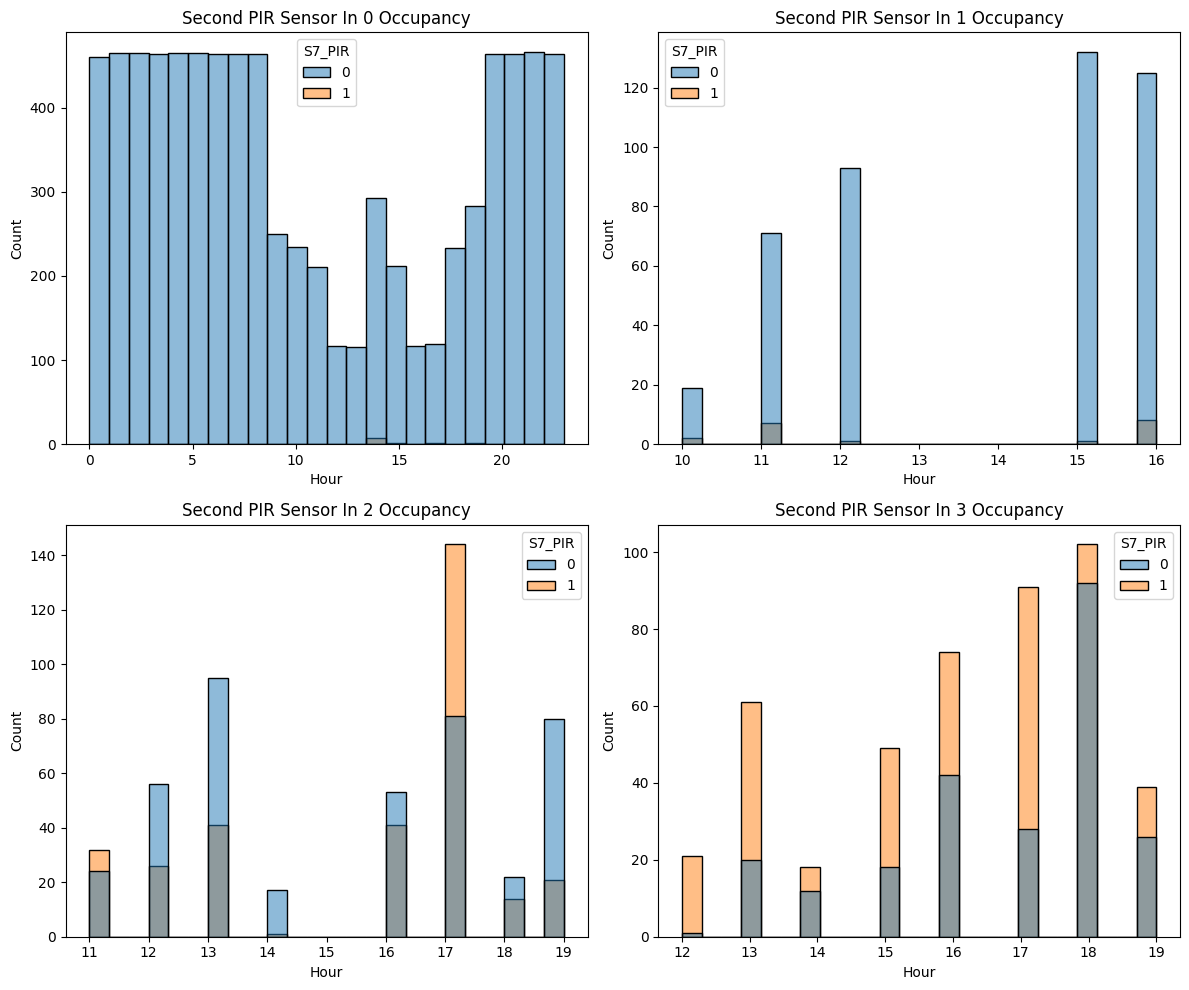

In [20]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

O1 = df[(df['Room_Occupancy_Count'] == 0)]
O2 = df[(df['Room_Occupancy_Count'] == 1)]
O3 = df[(df['Room_Occupancy_Count'] == 2)]
O4 = df[(df['Room_Occupancy_Count'] == 3)]

sns.histplot(x='Hour', hue='S7_PIR', data=O1, ax=axes[0, 0], bins = 24)
axes[0, 0].set_title('Second PIR Sensor In 0 Occupancy')
axes[0, 0].set_xlabel('Hour')
axes[0, 0].set_ylabel('Count')

sns.histplot(x='Hour', hue='S7_PIR', data=O2, ax=axes[0, 1], bins = 24)
axes[0, 1].set_title('Second PIR Sensor In 1 Occupancy')
axes[0, 1].set_xlabel('Hour')
axes[0, 1].set_ylabel('Count')

sns.histplot(x='Hour', hue='S7_PIR', data=O3, ax=axes[1, 0], bins = 24)
axes[1, 0].set_title('Second PIR Sensor In 2 Occupancy')
axes[1, 0].set_xlabel('Hour')
axes[1, 0].set_ylabel('Count')

sns.histplot(x='Hour', hue='S7_PIR', data=O4, ax=axes[1, 1], bins = 24)
axes[1, 1].set_title('Second PIR Sensor In 3 Occupancy')
axes[1, 1].set_xlabel('Hour')
axes[1, 1].set_ylabel('Count')
plt.tight_layout()
plt.show()

### Room Occupancy

<Axes: xlabel='Room_Occupancy_Count', ylabel='count'>

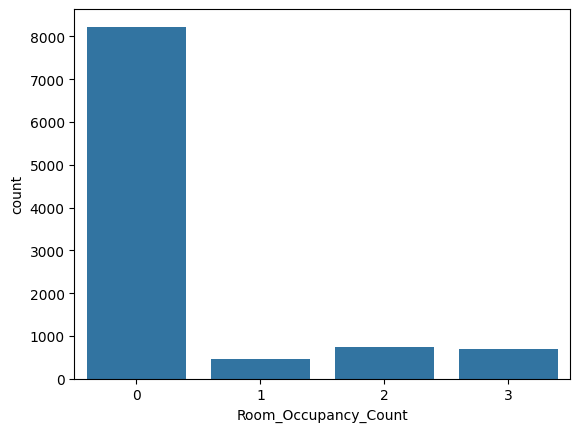

In [21]:
sns.countplot(x = 'Room_Occupancy_Count' , data = df)

# My Preprocessing Results

### Preprocessing & Preparing

In [22]:
mine = pd.DataFrame(df)
mine['Temp_Mean'] = (mine['S1_Temp'] + mine['S3_Temp'] + mine['S4_Temp']) / 3

In [23]:
mine = mine[['Day','Hour', 'Time_Period','Temp_Mean', 'S1_Light', 'S3_Light', 'S4_Light','S1_Sound', 'S2_Sound', 'S3_Sound', 'S4_Sound', 'S5_CO2', 'S5_CO2_Slope', 'S6_PIR', 'Room_Occupancy_Count']]

In [24]:
mine.columns

Index(['Day', 'Hour', 'Time_Period', 'Temp_Mean', 'S1_Light', 'S3_Light',
       'S4_Light', 'S1_Sound', 'S2_Sound', 'S3_Sound', 'S4_Sound', 'S5_CO2',
       'S5_CO2_Slope', 'S6_PIR', 'Room_Occupancy_Count'],
      dtype='object')

In [25]:
now1 = mine[(mine['Room_Occupancy_Count'] == 0)]
now2 = mine[(mine['Room_Occupancy_Count'] == 1)]
now3 = mine[(mine['Room_Occupancy_Count'] == 2)]
now4 = mine[(mine['Room_Occupancy_Count'] == 3)]
print("Duplication For Class 0 After Preprocessing Is: " , now1.duplicated().sum())
print("Duplication For Class 1 After Preprocessing Is: " , now2.duplicated().sum())
print("Duplication For Class 2 After Preprocessing Is: " , now3.duplicated().sum())
print("Duplication For Class 3 After Preprocessing Is: " , now4.duplicated().sum())

mine = mine.drop_duplicates(keep = False)
print("Removing Duplicates...")

Duplication For Class 0 After Preprocessing Is:  1407
Duplication For Class 1 After Preprocessing Is:  0
Duplication For Class 2 After Preprocessing Is:  0
Duplication For Class 3 After Preprocessing Is:  0
Removing Duplicates...


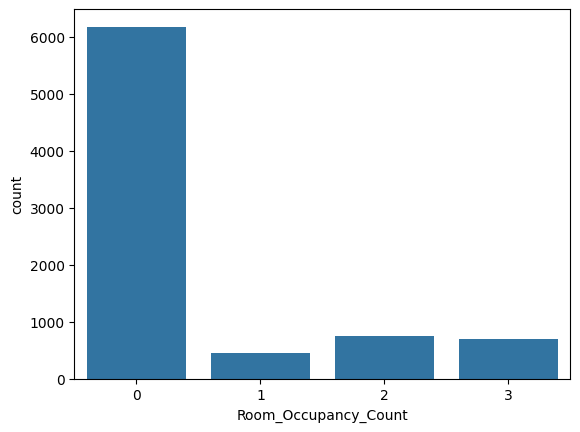

In [26]:
sns.countplot(x = 'Room_Occupancy_Count' , data = mine)
plt.show()

In [30]:
now1hour = pd.DataFrame(mine[['Room_Occupancy_Count', 'Hour']])

ct = pd.crosstab(now1hour['Room_Occupancy_Count'], now1hour['Hour'])

ct

Hour,10,11,12,13,14,15,16,17,18,19
Room_Occupancy_Count,,,,,,,,,,
0,217,206,109,110,293,205,117,110,227,285
1,21,78,94,0,0,133,133,0,0,0
2,0,56,82,136,18,0,94,225,36,101
3,0,0,22,81,30,67,116,119,194,65


In [31]:
mine = mine[mine['Time_Period'] != 'Night']
mine = mine[(mine['Hour'] != 6)]
mine = mine[(mine['Hour'] != 7)]
mine = mine[(mine['Hour'] != 8)]
mine = mine[(mine['Hour'] != 9)]
mine = mine[(mine['Hour'] != 23)]
mine = mine[(mine['Hour'] != 22)]
mine = mine[(mine['Hour'] != 21)]
mine = mine[(mine['Hour'] != 20)]

In [32]:
now1hour = pd.DataFrame(mine[['Room_Occupancy_Count', 'Hour']])
ct = pd.crosstab(now1hour['Room_Occupancy_Count'], now1hour['Hour'])

ct

Hour,10,11,12,13,14,15,16,17,18,19
Room_Occupancy_Count,,,,,,,,,,
0,217,206,109,110,293,205,117,110,227,285
1,21,78,94,0,0,133,133,0,0,0
2,0,56,82,136,18,0,94,225,36,101
3,0,0,22,81,30,67,116,119,194,65


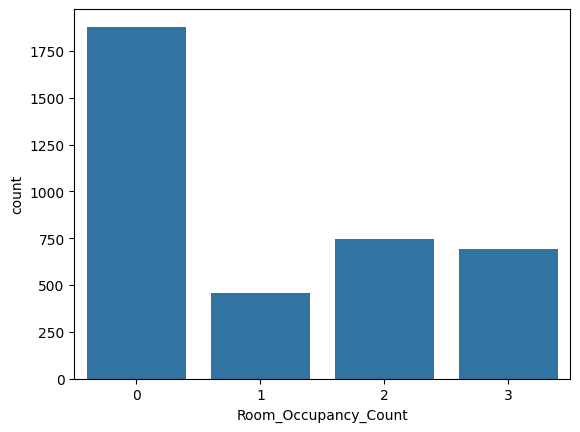

In [33]:
sns.countplot(x = 'Room_Occupancy_Count' , data = mine)
plt.show()

In [34]:
mine = mine.reset_index(drop=True)
mine

,Day,Hour,Time_Period,Temp_Mean,S1_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,Room_Occupancy_Count
0,1,10,Morning,24.960000,121,53,40,0.08,0.19,0.06,0.06,390,0.769231,0,1
1,1,10,Morning,24.980000,121,53,40,0.93,0.05,0.06,0.06,390,0.646154,0,1
2,1,10,Morning,24.980000,121,53,40,0.43,0.11,0.08,0.06,390,0.519231,0,1
3,1,10,Morning,25.000000,121,53,40,0.41,0.10,0.10,0.09,390,0.388462,0,1
4,1,10,Morning,25.000000,121,54,40,0.18,0.06,0.06,0.06,390,0.253846,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3775,6,19,Evening,25.460000,0,0,0,0.07,0.05,0.05,0.09,435,-2.050000,0,0
3776,6,19,Evening,25.460000,0,0,0,0.07,0.04,0.05,0.09,430,-2.192308,0,0
3777,6,19,Evening,25.460000,0,0,0,0.07,0.05,0.06,0.09,435,-2.153846,0,0
3778,6,19,Evening,25.440000,0,0,0,0.07,0.05,0.05,0.09,435,-2.126923,0,0


### Modelling

https://towardsdatascience.com/cross-validation-and-grid-search-efa64b127c1b https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

In [35]:
from sklearn.metrics import accuracy_score, f1_score

from sklearn.preprocessing import StandardScaler
SC = StandardScaler()

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV

from sklearn.svm import SVC

from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier


from sklearn import preprocessing
LE = preprocessing.LabelEncoder()
mine['Time_Period'] = LE.fit_transform(mine['Time_Period'])

xm = mine.drop(['Room_Occupancy_Count'] , axis = 1)
ym = mine['Room_Occupancy_Count']

xm = SC.fit_transform(xm)
xm_train, xm_test, ym_train, ym_test = train_test_split(xm, ym, test_size=0.2, random_state=0)

from imblearn.over_sampling import SMOTE
SMOTE = SMOTE()

xm_smote, ym_smote = SMOTE.fit_resample(xm_train, ym_train)

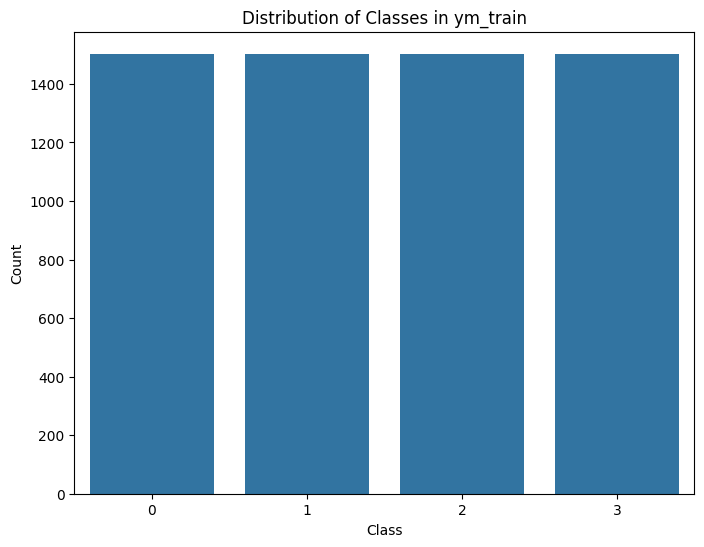

In [36]:
plt.figure(figsize=(8, 6))
sns.countplot(x=ym_smote)

plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Distribution of Classes in ym_train')
plt.show()

### Random Forest

Best Parameters Are:  {'max_depth': 8, 'n_estimators': 200}
Validation Scores for Each Fold:
Fold 1: 0.9920159680638723
Fold 2: 0.9933466400532269
Fold 3: 0.9966733200266135
Fold 4: 0.9960079840319361
Validation Score:  0.9945109780439122
F1-Score Equals =  0.9904817172833549
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       376
           1       0.99      1.00      1.00       113
           2       0.98      0.99      0.98       141
           3       0.99      0.98      0.98       126

    accuracy                           0.99       756
   macro avg       0.99      0.99      0.99       756
weighted avg       0.99      0.99      0.99       756



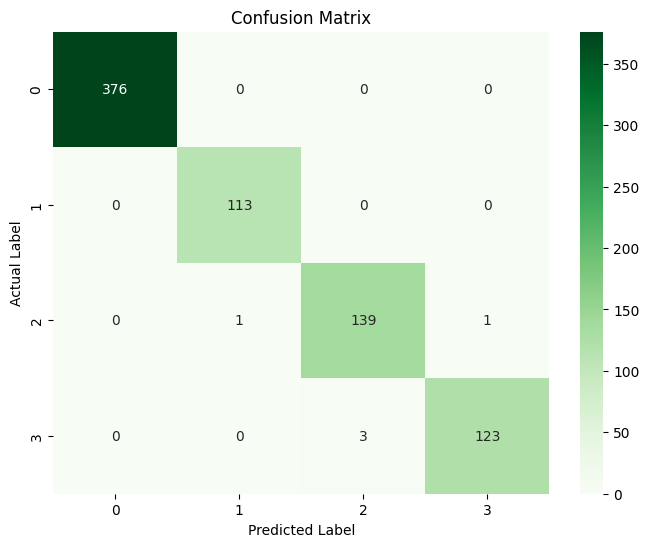

In [ ]:
HyperPs = {'n_estimators': [100,150,200],'max_depth' : [4,6,8]}
RF_CV = GridSearchCV(estimator = RandomForestClassifier(), param_grid = HyperPs, cv= 4)
RF_CV.fit(xm_smote, ym_smote)
print("Best Parameters Are: " , RF_CV.best_params_)

print("Validation Scores for Each Fold:")
for i in range(4):
    fold_key = f'split{i}_test_score'
    print(f"Fold {i + 1}: {RF_CV.cv_results_[fold_key][RF_CV.best_index_]}")
print("Validation Score: ", RF_CV.best_score_)

ym_pred = RF_CV.predict(xm_test)
print("F1-Score Equals = " , f1_score(ym_test , ym_pred , average = 'macro'))

print(classification_report(ym_test, ym_pred))
Compare = pd.DataFrame()
Compare['Actual'] = ym_test
Compare['Predicted'] = ym_pred

from sklearn.metrics import confusion_matrix
CM = confusion_matrix(ym_test, ym_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(CM, annot=True, fmt='d', cmap='Greens', xticklabels=[0, 1, 2, 3], yticklabels=[0, 1, 2, 3])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

### SVC

Best Parameters Are:  {'kernel': 'poly'}
Validation Scores for Each Fold:
Fold 1: 0.9827012641383899
Fold 2: 0.9840319361277445
Fold 3: 0.9873586161011311
Fold 4: 0.9926813040585496
Validation Score:  0.9866932801064537
F1-Score Equals =  0.9873112441634413
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       376
           1       1.00      0.99      1.00       113
           2       0.97      0.99      0.98       141
           3       0.98      0.97      0.98       126

    accuracy                           0.99       756
   macro avg       0.99      0.99      0.99       756
weighted avg       0.99      0.99      0.99       756



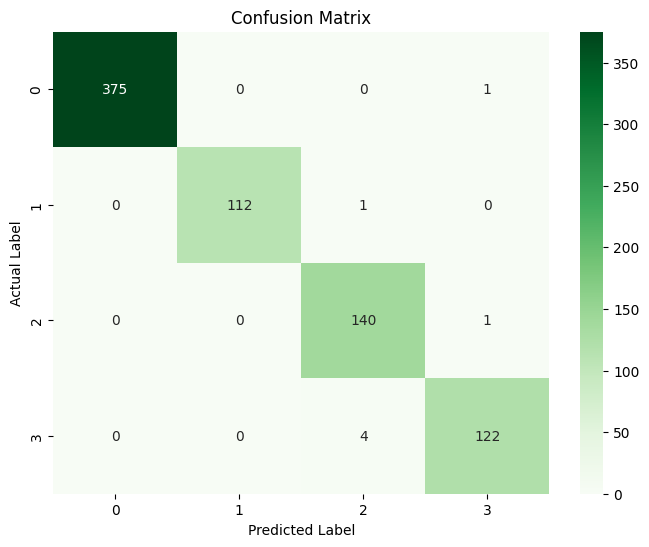

In [ ]:
HyperPs = {'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}
SV_CV = GridSearchCV(estimator = SVC(), param_grid = HyperPs, cv= 4)
SV_CV.fit(xm_smote, ym_smote)
print("Best Parameters Are: " , SV_CV.best_params_)

print("Validation Scores for Each Fold:")
for i in range(4):
    fold_key = f'split{i}_test_score'
    print(f"Fold {i + 1}: {SV_CV.cv_results_[fold_key][SV_CV.best_index_]}")
print("Validation Score: ", SV_CV.best_score_)

ym_pred = SV_CV.predict(xm_test)
print("F1-Score Equals = " , f1_score(ym_test , ym_pred , average = 'macro'))

print(classification_report(ym_test, ym_pred))

Compare = pd.DataFrame()
Compare['Actual'] = ym_test
Compare['Predicted'] = ym_pred

from sklearn.metrics import confusion_matrix
CM = confusion_matrix(ym_test, ym_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(CM, annot=True, fmt='d', cmap='Greens', xticklabels=[0, 1, 2, 3], yticklabels=[0, 1, 2, 3])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

### Gradiant Boost

Best Parameters Are:  {'learning_rate': 0.1, 'n_estimators': 200}
Validation Scores for Each Fold:
Fold 1: 0.9920159680638723
Fold 2: 0.9913506320691949
Fold 3: 0.9960079840319361
Fold 4: 0.998003992015968
Validation Score:  0.9943446440452428
F1-Score Equals =  0.9885931944244024
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       376
           1       0.99      1.00      1.00       113
           2       0.97      0.99      0.98       141
           3       1.00      0.96      0.98       126

    accuracy                           0.99       756
   macro avg       0.99      0.99      0.99       756
weighted avg       0.99      0.99      0.99       756



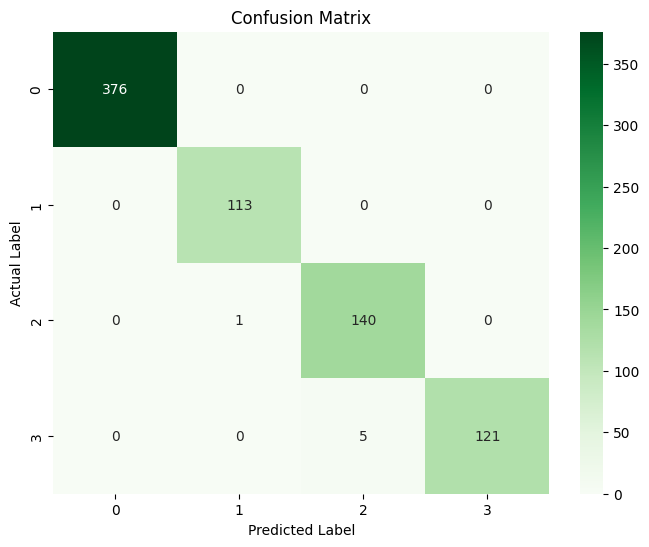

In [ ]:
HyperPs = {'n_estimators': [100, 150, 200] , 'learning_rate': [0.1, 0.01, 0.001, 0.0001]}
GB_CV = GridSearchCV(estimator = GradientBoostingClassifier(), param_grid = HyperPs, cv= 4)
GB_CV.fit(xm_smote, ym_smote)
print("Best Parameters Are: " , GB_CV.best_params_)

print("Validation Scores for Each Fold:")
for i in range(4):
    fold_key = f'split{i}_test_score'
    print(f"Fold {i + 1}: {GB_CV.cv_results_[fold_key][GB_CV.best_index_]}")
print("Validation Score: ", GB_CV.best_score_)

ym_pred = GB_CV.predict(xm_test)
print("F1-Score Equals = " , f1_score(ym_test , ym_pred , average = 'macro'))

print(classification_report(ym_test, ym_pred))

Compare = pd.DataFrame()
Compare['Actual'] = ym_test
Compare['Predicted'] = ym_pred

from sklearn.metrics import confusion_matrix
CM = confusion_matrix(ym_test, ym_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(CM, annot=True, fmt='d', cmap='Greens', xticklabels=[0, 1, 2, 3], yticklabels=[0, 1, 2, 3])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

### XGBoost

Best Parameters Are:  {'lambda': 1.0, 'learning_rate': 0.1, 'n_estimators': 150}
Validation Scores for Each Fold:
Fold 1: 0.9953426480372588
Fold 2: 0.9940119760479041
Fold 3: 0.9966733200266135
Fold 4: 0.9993346640053227
Validation Score:  0.9963406520292748
F1-Score Equals =  0.9866271794209909
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       376
           1       0.99      0.99      0.99       113
           2       0.97      0.99      0.98       141
           3       0.99      0.97      0.98       126

    accuracy                           0.99       756
   macro avg       0.99      0.99      0.99       756
weighted avg       0.99      0.99      0.99       756



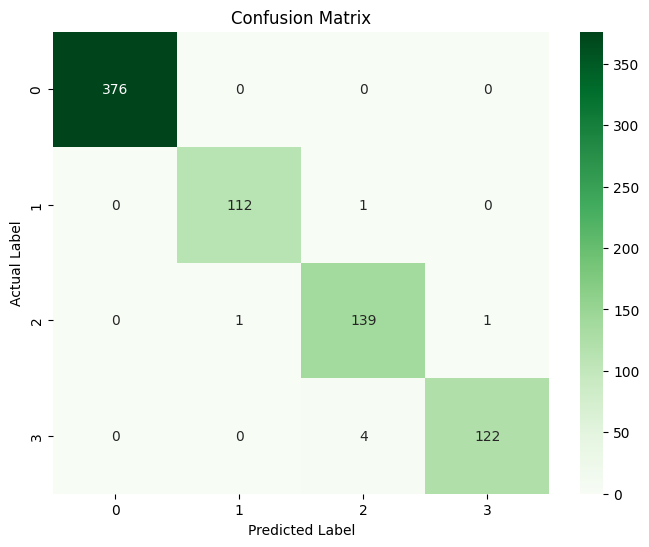

In [ ]:
HyperPs = {'n_estimators': [100, 150, 200] , 'learning_rate': [0.1, 0.01, 0.001, 0.0001], 'lambda': [1.0]}
XG_CV = GridSearchCV(estimator = XGBClassifier(), param_grid = HyperPs, cv= 4)
XG_CV.fit(xm_smote, ym_smote)
print("Best Parameters Are: " , XG_CV.best_params_)

print("Validation Scores for Each Fold:")
for i in range(4):
    fold_key = f'split{i}_test_score'
    print(f"Fold {i + 1}: {XG_CV.cv_results_[fold_key][XG_CV.best_index_]}")
print("Validation Score: ", XG_CV.best_score_)

ym_pred = XG_CV.predict(xm_test)
print("F1-Score Equals = " , f1_score(ym_test , ym_pred , average = 'macro'))

print(classification_report(ym_test, ym_pred))

Compare = pd.DataFrame()
Compare['Actual'] = ym_test
Compare['Predicted'] = ym_pred

from sklearn.metrics import confusion_matrix
CM = confusion_matrix(ym_test, ym_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(CM, annot=True, fmt='d', cmap='Greens', xticklabels=[0, 1, 2, 3], yticklabels=[0, 1, 2, 3])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

# Without Preprocessing

### Preparing

In [37]:
df

,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,...,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count,Day,Hour,Time_Period,Temp_Mean
0,24.94,24.75,24.56,25.38,121,34,53,40,0.08,0.19,...,0.06,390,0.769231,0,0,1,1,10,Morning,24.960000
1,24.94,24.75,24.56,25.44,121,33,53,40,0.93,0.05,...,0.06,390,0.646154,0,0,1,1,10,Morning,24.980000
2,25.00,24.75,24.50,25.44,121,34,53,40,0.43,0.11,...,0.06,390,0.519231,0,0,1,1,10,Morning,24.980000
3,25.00,24.75,24.56,25.44,121,34,53,40,0.41,0.10,...,0.09,390,0.388462,0,0,1,1,10,Morning,25.000000
4,25.00,24.75,24.56,25.44,121,34,54,40,0.18,0.06,...,0.06,390,0.253846,0,0,1,1,10,Morning,25.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10124,25.06,25.13,24.69,25.31,6,7,33,22,0.09,0.04,...,0.08,345,0.000000,0,0,0,7,8,Morning,25.020000
10125,25.06,25.06,24.69,25.25,6,7,34,22,0.07,0.05,...,0.08,345,0.000000,0,0,0,7,8,Morning,25.000000
10126,25.13,25.06,24.69,25.25,6,7,34,22,0.11,0.05,...,0.08,345,0.000000,0,0,0,7,8,Morning,25.023333
10127,25.13,25.06,24.69,25.25,6,7,34,22,0.08,0.08,...,0.08,345,0.000000,0,0,0,7,8,Morning,25.023333


In [38]:
df.duplicated().sum()
df = df.drop_duplicates(keep = False)

In [39]:
df = df.reset_index(drop=True)
df

,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,...,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count,Day,Hour,Time_Period,Temp_Mean
0,24.94,24.75,24.56,25.38,121,34,53,40,0.08,0.19,...,0.06,390,0.769231,0,0,1,1,10,Morning,24.960000
1,24.94,24.75,24.56,25.44,121,33,53,40,0.93,0.05,...,0.06,390,0.646154,0,0,1,1,10,Morning,24.980000
2,25.00,24.75,24.50,25.44,121,34,53,40,0.43,0.11,...,0.06,390,0.519231,0,0,1,1,10,Morning,24.980000
3,25.00,24.75,24.56,25.44,121,34,53,40,0.41,0.10,...,0.09,390,0.388462,0,0,1,1,10,Morning,25.000000
4,25.00,24.75,24.56,25.44,121,34,54,40,0.18,0.06,...,0.06,390,0.253846,0,0,1,1,10,Morning,25.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8483,25.06,25.13,24.69,25.31,6,7,33,22,0.09,0.04,...,0.08,345,0.000000,0,0,0,7,8,Morning,25.020000
8484,25.06,25.06,24.69,25.25,6,7,34,22,0.07,0.05,...,0.08,345,0.000000,0,0,0,7,8,Morning,25.000000
8485,25.13,25.06,24.69,25.25,6,7,34,22,0.11,0.05,...,0.08,345,0.000000,0,0,0,7,8,Morning,25.023333
8486,25.13,25.06,24.69,25.25,6,7,34,22,0.08,0.08,...,0.08,345,0.000000,0,0,0,7,8,Morning,25.023333


### Modelling

In [40]:
from sklearn import preprocessing
LE = preprocessing.LabelEncoder()
df['Time_Period'] = LE.fit_transform(df['Time_Period'])

x = df.drop(['Room_Occupancy_Count'] , axis = 1)
y = df['Room_Occupancy_Count']

x = SC.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

x_smote, y_smote = SMOTE.fit_resample(x_train, y_train)

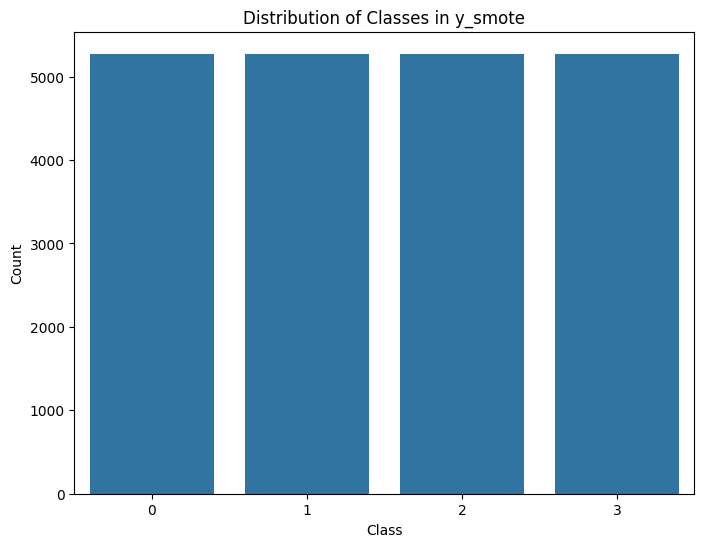

In [41]:
plt.figure(figsize=(8, 6))
sns.countplot(x = y_smote)

plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Distribution of Classes in y_smote')
plt.show()

### Random Forest

Best Parameters Are:  {'max_depth': 8, 'n_estimators': 150}
Validation Scores for Each Fold:
Fold 1: 0.9967760288260952
Fold 2: 0.9982931917314621
Fold 3: 0.998482837094633
Fold 4: 0.9982931917314621
Validation Score:  0.9979613123459131
F1-Score Equals =  0.9821699605900464
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1314
           1       0.98      0.99      0.98        97
           2       0.96      0.98      0.97       148
           3       0.99      0.96      0.97       139

    accuracy                           0.99      1698
   macro avg       0.98      0.98      0.98      1698
weighted avg       0.99      0.99      0.99      1698



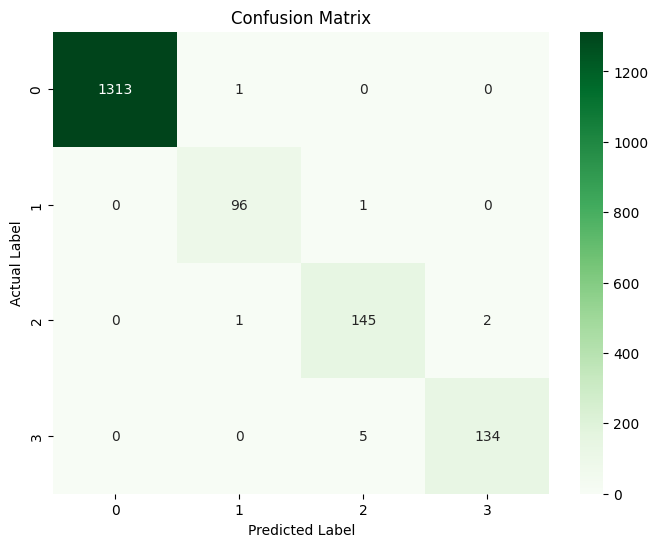

In [ ]:
grid = {'n_estimators': [100,150,200],'max_depth' : [4,6,8]}
WRFC = GridSearchCV(estimator = RandomForestClassifier(), param_grid=grid, cv= 4)
WRFC.fit(x_smote, y_smote)
print("Best Parameters Are: " , WRFC.best_params_)

print("Validation Scores for Each Fold:")
for i in range(4):
    fold_key = f'split{i}_test_score'
    print(f"Fold {i + 1}: {WRFC.cv_results_[fold_key][WRFC.best_index_]}")
print("Validation Score: ", WRFC.best_score_)

y_pred = WRFC.predict(x_test)
print("F1-Score Equals = " , f1_score(y_test , y_pred , average = 'macro'))

print(classification_report(y_test, y_pred))
Compare = pd.DataFrame()
Compare['Actual'] = y_test
Compare['Predicted'] = y_pred

from sklearn.metrics import confusion_matrix
CM = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(CM, annot=True, fmt='d', cmap='Greens', xticklabels=[0, 1, 2, 3], yticklabels=[0, 1, 2, 3])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

### SVC

Best Parameters Are:  {'kernel': 'poly'}
Validation Scores for Each Fold:
Fold 1: 0.9950692205575574
Fold 2: 0.9975346102787787
Fold 3: 0.997155319552437
Fold 4: 0.9973449649156079
Validation Score:  0.9967760288260952
F1-Score Equals =  0.98331923327836
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1314
           1       0.99      0.99      0.99        97
           2       0.96      0.99      0.97       148
           3       0.98      0.96      0.97       139

    accuracy                           0.99      1698
   macro avg       0.98      0.98      0.98      1698
weighted avg       0.99      0.99      0.99      1698



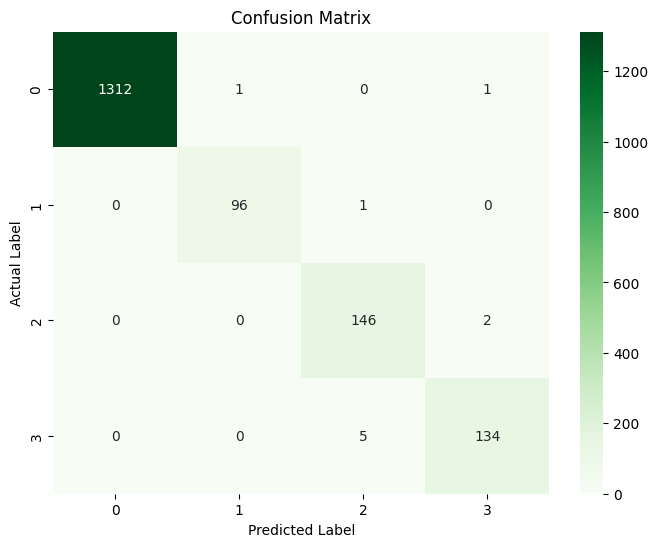

In [ ]:
HyperPs = {'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}
WSV_CV = GridSearchCV(estimator = SVC(), param_grid = HyperPs, cv= 4)
WSV_CV.fit(x_smote, y_smote)
print("Best Parameters Are: " , WSV_CV.best_params_)

print("Validation Scores for Each Fold:")
for i in range(4):
    fold_key = f'split{i}_test_score'
    print(f"Fold {i + 1}: {WSV_CV.cv_results_[fold_key][WSV_CV.best_index_]}")
print("Validation Score: ", WSV_CV.best_score_)

y_pred = WSV_CV.predict(x_test)
print("F1-Score Equals = " , f1_score(y_test , y_pred , average = 'macro'))

print(classification_report(y_test, y_pred))

Compare = pd.DataFrame()
Compare['Actual'] = y_test
Compare['Predicted'] = y_pred

from sklearn.metrics import confusion_matrix
CM = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(CM, annot=True, fmt='d', cmap='Greens', xticklabels=[0, 1, 2, 3], yticklabels=[0, 1, 2, 3])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

### Gradient Boost

Best Parameters Are:  {'learning_rate': 0.1, 'n_estimators': 150}
Validation Scores for Each Fold:
Fold 1: 0.9965863834629244
Fold 2: 0.9990517731841456
Fold 3: 0.9990517731841456
Fold 4: 0.9982931917314621
Validation Score:  0.9982457803906695
F1-Score Equals =  0.9874090455292266
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1314
           1       0.98      0.99      0.98        97
           2       0.97      0.99      0.98       148
           3       1.00      0.97      0.99       139

    accuracy                           1.00      1698
   macro avg       0.99      0.99      0.99      1698
weighted avg       1.00      1.00      1.00      1698



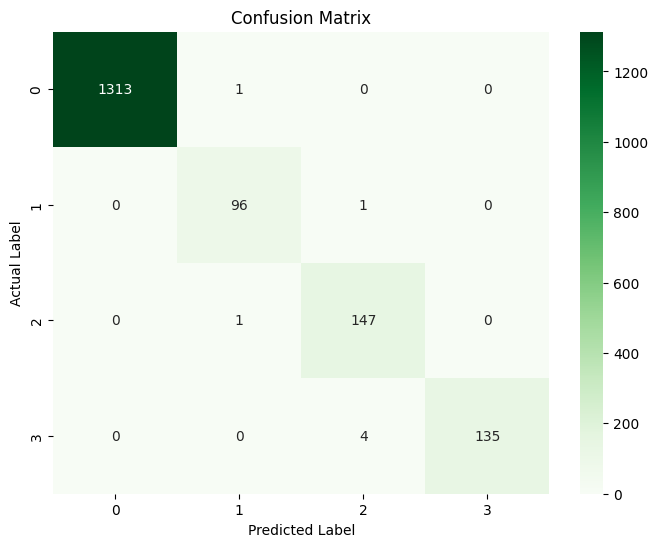

In [ ]:
HyperPs = {'n_estimators': [100, 150, 200] , 'learning_rate': [0.1, 0.01, 0.001, 0.0001]}
WGB_CV = GridSearchCV(estimator = GradientBoostingClassifier(), param_grid = HyperPs, cv= 4)
WGB_CV.fit(x_smote, y_smote)
print("Best Parameters Are: " , WGB_CV.best_params_)

print("Validation Scores for Each Fold:")
for i in range(4):
    fold_key = f'split{i}_test_score'
    print(f"Fold {i + 1}: {WGB_CV.cv_results_[fold_key][WGB_CV.best_index_]}")
print("Validation Score: ", WGB_CV.best_score_)

y_pred = WGB_CV.predict(x_test)
print("F1-Score Equals = " , f1_score(y_test , y_pred , average = 'macro'))

print(classification_report(y_test, y_pred))

Compare = pd.DataFrame()
Compare['Actual'] = y_test
Compare['Predicted'] = y_pred

from sklearn.metrics import confusion_matrix
CM = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(CM, annot=True, fmt='d', cmap='Greens', xticklabels=[0, 1, 2, 3], yticklabels=[0, 1, 2, 3])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

### XGBoost

Best Parameters Are:  {'lambda': 1.0, 'learning_rate': 0.1, 'n_estimators': 200}
Validation Scores for Each Fold:
Fold 1: 0.9975346102787787
Fold 2: 0.9992414185473165
Fold 3: 0.9994310639104874
Fold 4: 0.9988621278209748
Validation Score:  0.9987673051393893
F1-Score Equals =  0.9891508058317611
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1314
           1       0.98      0.99      0.98        97
           2       0.97      0.99      0.98       148
           3       1.00      0.98      0.99       139

    accuracy                           1.00      1698
   macro avg       0.99      0.99      0.99      1698
weighted avg       1.00      1.00      1.00      1698



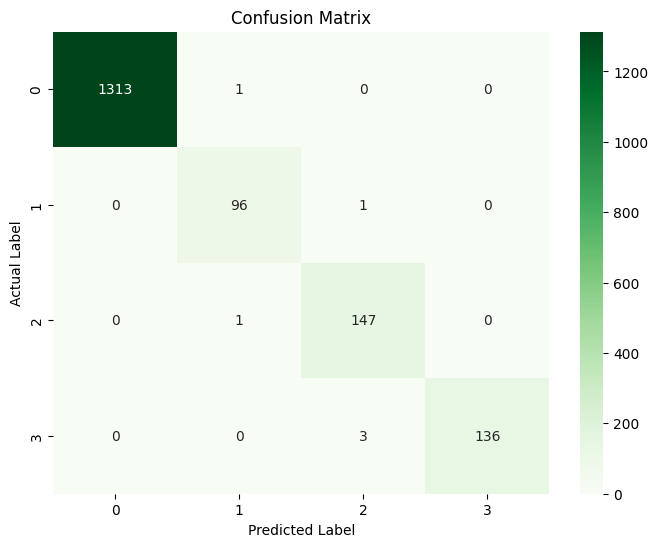

In [ ]:
HyperPs = {'n_estimators': [100, 150, 200] , 'learning_rate': [0.1, 0.01, 0.001, 0.0001], 'lambda': [1.0]}
WXG_CV = GridSearchCV(estimator = XGBClassifier(), param_grid = HyperPs, cv= 4)
WXG_CV.fit(x_smote, y_smote)
print("Best Parameters Are: " , WXG_CV.best_params_)

print("Validation Scores for Each Fold:")
for i in range(4):
    fold_key = f'split{i}_test_score'
    print(f"Fold {i + 1}: {WXG_CV.cv_results_[fold_key][WXG_CV.best_index_]}")
print("Validation Score: ", WXG_CV.best_score_)

y_pred = WXG_CV.predict(x_test)
print("F1-Score Equals = " , f1_score(y_test , y_pred , average = 'macro'))

print(classification_report(y_test, y_pred))

Compare = pd.DataFrame()
Compare['Actual'] = y_test
Compare['Predicted'] = y_pred

from sklearn.metrics import confusion_matrix
CM = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(CM, annot=True, fmt='d', cmap='Greens', xticklabels=[0, 1, 2, 3], yticklabels=[0, 1, 2, 3])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()